In [47]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import pylab as pl
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

Import the size and depth statistics about each lake

In [25]:
lake_stats = clean_columns(
    pd.read_csv("Lake physical data.csv",
                low_memory = False))
lake_stats.rename(columns={'lake': 'lake_name'}, inplace=True)
lake_stats.head()

5 column names have been cleaned

,lake_name,surface_area_acres,watershed_acres,average_depth_ft,maximum_depth_ft
0,Wawasee,3006,24448,22.0,81
1,Syracuse,411,24498,13.0,34
2,Dewart,554,5059,16.0,82
3,Webster,653,31459,12.5,52
4,James,278,35776,27.0,62


List the names of the lakes (exclude Yellow Creek)

In [30]:
lake_names = lake_stats.lake_name[:-1]
', '.join(lake_names)

'Wawasee, Syracuse, Dewart, Webster, James, Tippecanoe, Oswego, Big Barbee, Big Chapman, Center, Pike, Winona, Beaver Dam'

Import the lakes and streams measurements.

In [42]:
lakes = clean_columns(
    pd.read_csv("LakeData.csv",
                low_memory = False))
lakes['date'] = pd.to_datetime(lakes['date'], format='%m/%d/%Y')
lakes = lakes.drop(['site_type','mc_id', 'ac_id', 'pw', 'w', 'epi_hypo',
                    'notes', 'unnamed_50','unnamed_51','quanta_#',
                    'weather_meter_#', 'fluorometer_#',	'aquafluor_#', 
                    'van_dorn_#'], axis = 1).dropna(how = "all")
lakes = lakes.set_index(lakes.date)
lakes.head()

52 column names have been cleaned

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,no_2,no_3,si_o_2,srp,tp,tkn,tn,cond,ss,f
date,,,,,,,,,,,,,,,,,,,,,
2021-08-09,Beaver Dam,21221BEA2,2021-08-09,15:40,18.5,2.5,0.0,26.90,113.4,9.05,...,4V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-09,Beaver Dam,18190BEA2,2018-07-09,15:00,18.0,3.0,0.0,28.83,115.0,8.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-23,Beaver Dam,18204BEA2,2018-07-23,15:15,19.0,5.8,0.0,25.21,88.7,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,Beaver Dam,18211BEA2,2018-07-31,15:00,18.6,4.4,0.0,25.10,103.3,8.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-06,Beaver Dam,18218BEA2,2018-08-06,14:45,18.8,4.4,0.0,28.77,120.2,9.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#create a data frame dictionary to store your data frames
by_lake = dict(tuple(lakes.groupby('lake_name')))
by_lake['Winona'].head()

,lake_name,id_#,date,time,total_depth_m,secchi_depth,depth_m,water_temp_cel_s,do_%_sat,do_mg_l,...,no_2,no_3,si_o_2,srp,tp,tkn,tn,cond,ss,f
date,,,,,,,,,,,,,,,,,,,,,
2021-08-09,Winona,21221WIN2,2021-08-09,12:24,23.5,2.6,0.0,26.20,115.9,9.38,...,4V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-13,Winona,18164WIN2,2018-06-13,16:00,23.7,4.5,0.0,23.26,110.3,9.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-27,Winona,18178WIN2,2018-06-27,16:00,23.9,3.9,0.0,23.88,109.7,9.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-11,Winona,18192WIN2,2018-07-11,16:11,24.0,2.8,0.0,29.32,133.9,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-18,Winona,18199WIN2,2018-07-18,16:00,23.0,3.3,0.0,28.54,131.7,10.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The following is just playing around with a single lake.  In the future, this code should be turned into a function and mapped to the dictionary.

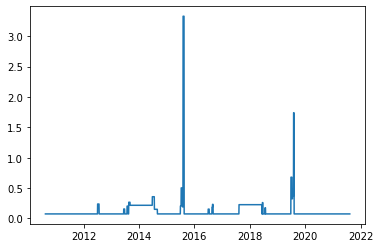

In [90]:
W = by_lake['Winona']['mc_ppb'].dropna()
W = W.asfreq('d')
W = W.fillna(method='bfill').fillna(method='ffill')
plt.plot(W)
#res=seasonal_decompose(W)

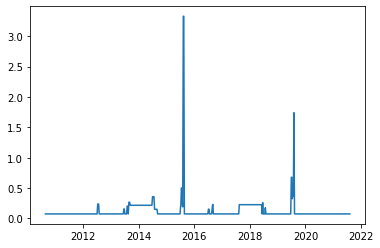

In [84]:
plt.plot(res.trend)

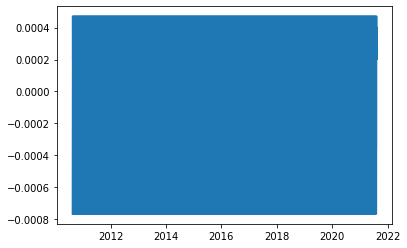

In [85]:
plt.plot(res.seasonal)

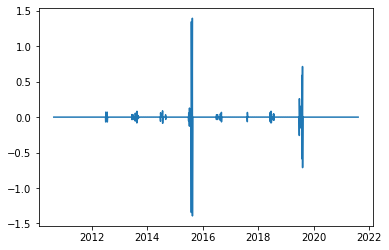

In [86]:
plt.plot(res.resid)

In [9]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [10]:
cdf = clean_df[["do_mg_l", "mc_ppb", "water_temp_cel_s"]]
cdf.head(9)

,do_mg_l,mc_ppb,water_temp_cel_s
0,9.05,NaN,26.90
1,8.75,0.075,28.83
2,7.27,0.075,25.21
3,8.55,0.075,25.10
4,9.30,0.075,28.77
5,13.83,0.075,22.40
6,12.27,0.075,25.40
7,10.82,0.075,23.70
8,8.15,0.075,26.30


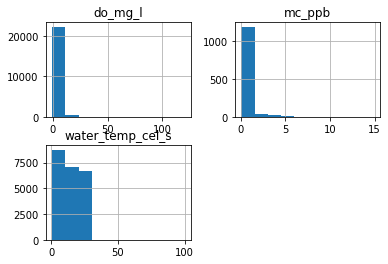

In [11]:
viz = cdf[["do_mg_l", "mc_ppb", "water_temp_cel_s"]]
viz.hist()
plt.show()

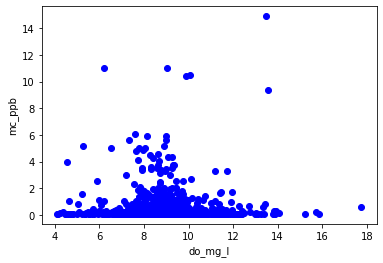

In [12]:
plt.scatter(cdf.do_mg_l, cdf.mc_ppb,  color='blue')
plt.xlabel("do_mg_l")
plt.ylabel("mc_ppb")
plt.show()

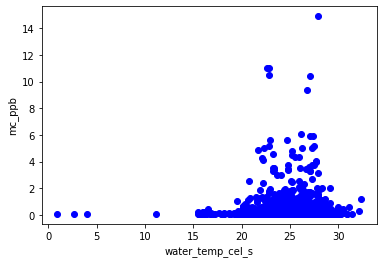

In [13]:
plt.scatter(cdf.water_temp_cel_s, cdf.mc_ppb,  color='blue')
plt.xlabel("water_temp_cel_s")
plt.ylabel("mc_ppb")
plt.show()

In [14]:
clean_df_lin = cdf.dropna()
clean_df_lin

msk = np.random.rand(len(clean_df_lin)) < 0.8
train = clean_df_lin[msk]
test = clean_df_lin[~msk]

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
